In [2]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib



In [3]:
import numpy as np
import pandas as pd
import cv2

In [4]:
from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [5]:
import os

csv_path = 'object_detection/labels_train.csv'
if os.path.exists(csv_path):
	labels_df = pd.read_csv(csv_path)
else:
	print(f"File not found: {csv_path}. Please check the path or provide the file.")
	labels_df = None

File not found: object_detection/labels_train.csv. Please check the path or provide the file.


In [6]:
df = pd.read_csv("/Users/bhumijain/Desktop/yolo/Object detection/labels_train.csv")
df = shuffle(df)
print(df.head())

                          frame  xmin  xmax  ymin  ymax  class_id
38037   1478896919797383147.jpg   123   132   155   168         1
406     1478020203195618875.jpg   248   256   132   142         5
29995   1478732990782667737.jpg   267   329   128   150         1
111864  1479504528384252326.jpg    68   102   142   156         1
47176   1478897653331864127.jpg    75    87   148   173         3


This dataset is mostly a practice and training aspect for the subject of YOLO. The data is labeled with 5 classes.

classic_id labels: 'car', 'truck', 'pedestrian', 'bicyclist', 'light'


In [7]:
classes = df.class_id.unique()
print(classes)

[1 5 3 2 4]


In [8]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}


Show some labeled images



In [9]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

# Absolute path
base_path = "/Users/bhumijain/Desktop/yolo/Object detection/images/"

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    # Load the image
    images[class_id] = cv2.imread(base_path + first_row['frame'])
    
    # Store bounding box
    boxes[class_id] = [
        first_row['xmin'], first_row['xmax'],
        first_row['ymin'], first_row['ymax']
    ]

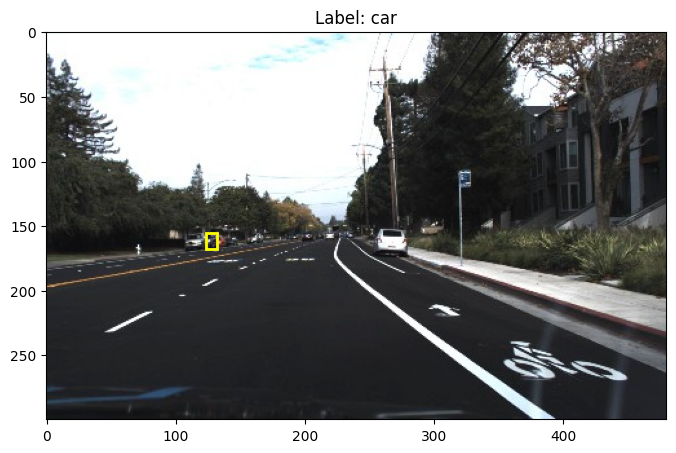

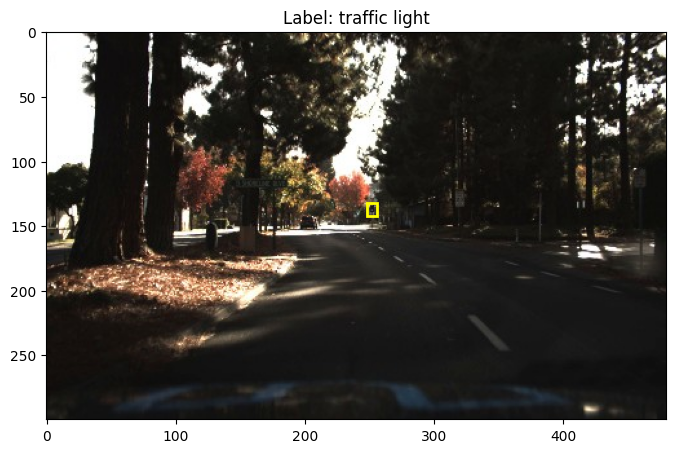

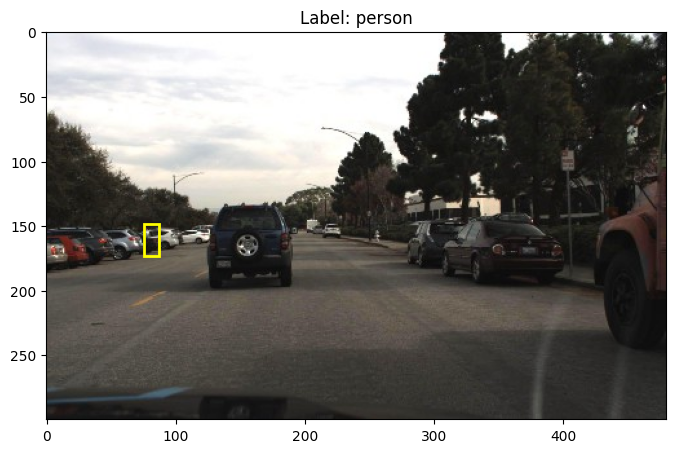

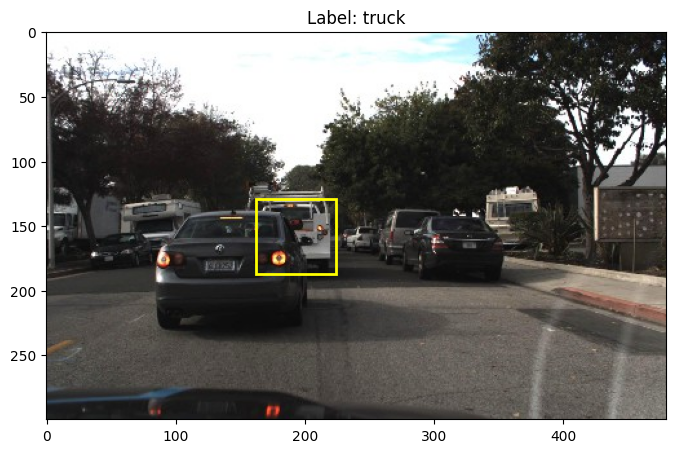

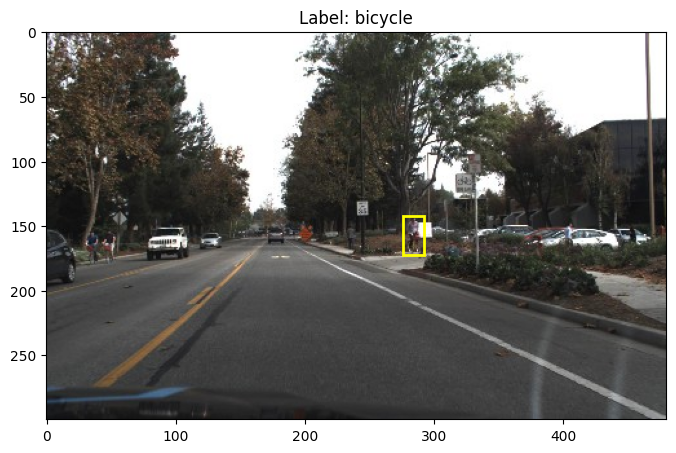

In [10]:
import matplotlib.pyplot as plt

for i in classes:
    xmin, xmax, ymin, ymax = boxes[i]

    plt.figure(figsize=(8, 10))
    plt.title("Label: " + labels[i])

    # Show the image
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # convert BGR → RGB

    # Draw bounding box
    plt.gca().add_patch(
        plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                      color='yellow', fill=False, linewidth=2)
    )

    plt.show()

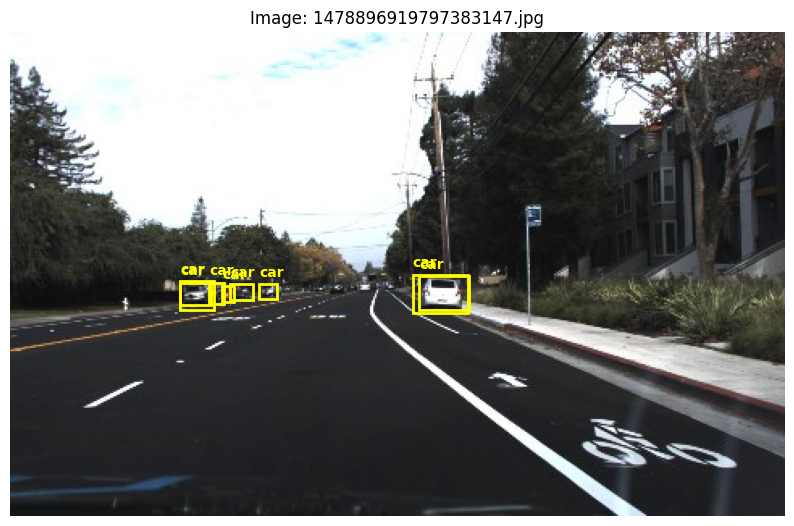

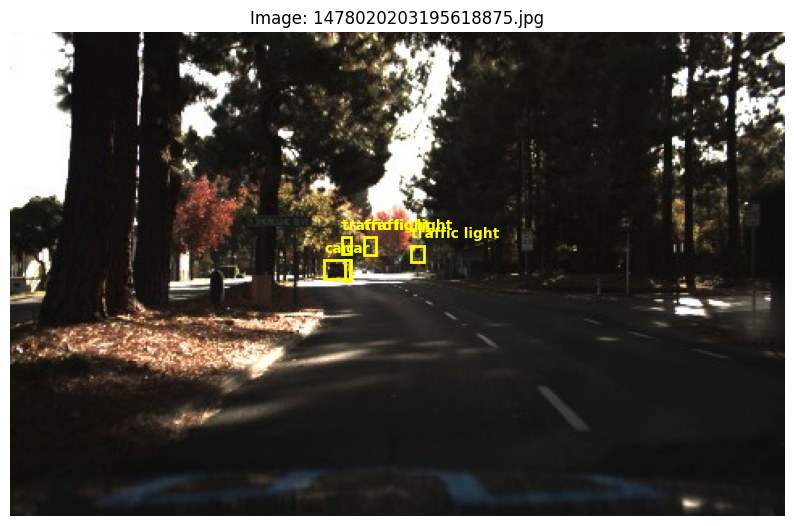

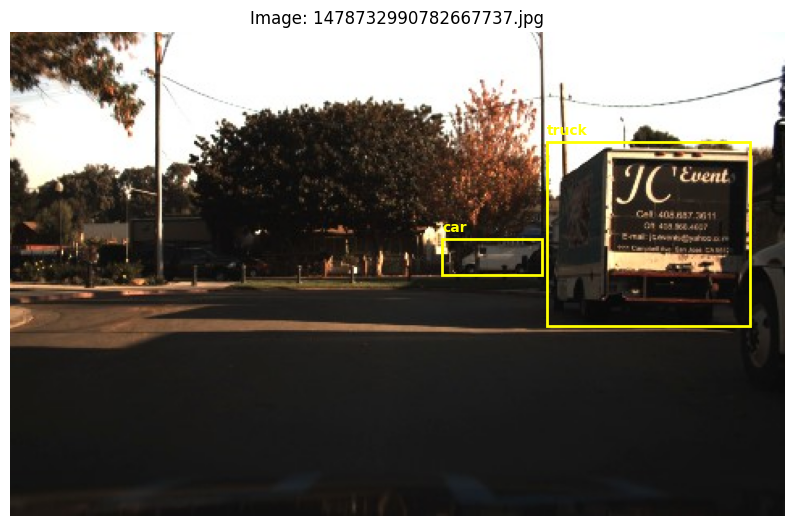

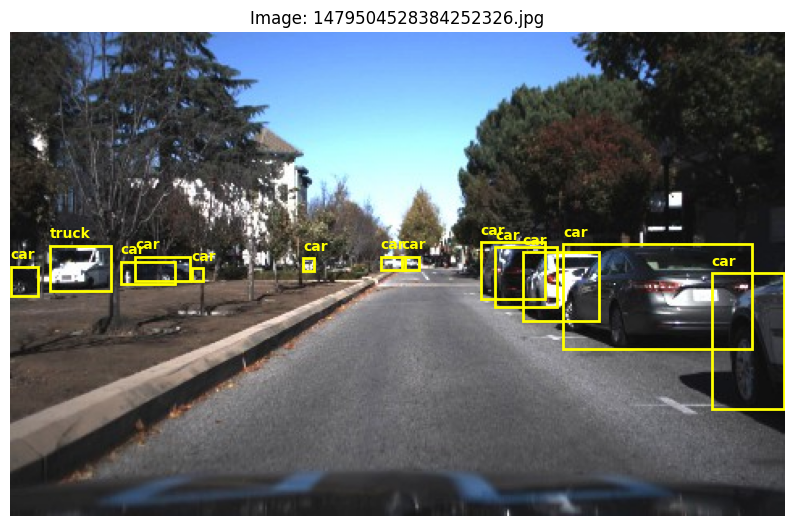

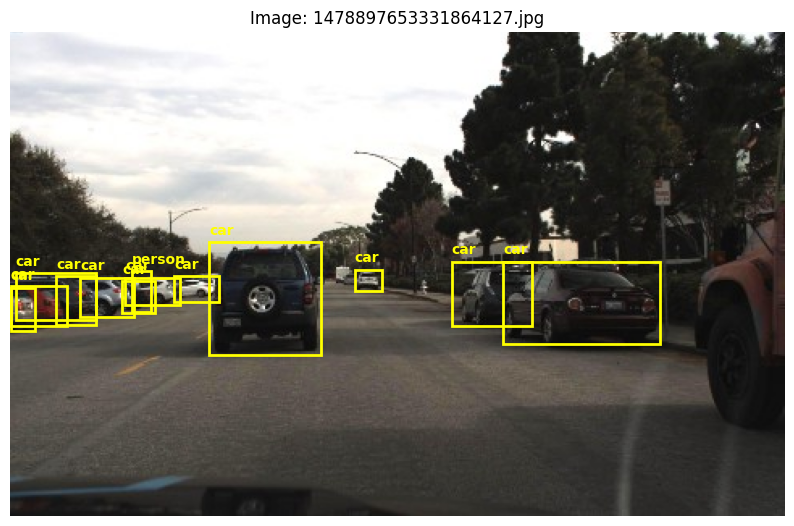

In [11]:
import matplotlib.pyplot as plt

# Show first 5 images with all bounding boxes
for frame_name in df['frame'].unique()[:5]:  
    # Get all rows for this frame (could have multiple objects)
    rows = df[df['frame'] == frame_name]

    # Load image
    img = cv2.imread("/Users/bhumijain/Desktop/yolo/Object detection/images/" + frame_name)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)

    # Draw all bounding boxes for this image
    for _, row in rows.iterrows():
        xmin, xmax, ymin, ymax = row['xmin'], row['xmax'], row['ymin'], row['ymax']
        class_id = row['class_id']
        
        plt.gca().add_patch(
            plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                          color='yellow', fill=False, linewidth=2)
        )
        plt.text(xmin, ymin - 5, labels[class_id], color='yellow', fontsize=10, weight='bold')

    plt.title(f"Image: {frame_name}")
    plt.axis("off")
    plt.show()


*Model*

In [14]:
!pip install ultralytics


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [12]:

from ultralytics import YOLO


In [15]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

In [16]:
model = YOLO("yolov8m.pt")


WARNING ⚠️ Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8m.pt...


######################################################################## 100.0%


In [19]:
results=model.predict(source="/Users/bhumijain/Desktop/yolo/Object detection/images/1478019956680248165.jpg",save=True, conf=0.2,iou=0.5)


image 1/1 /Users/bhumijain/Desktop/yolo/Object detection/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 191.6ms
Speed: 7.3ms preprocess, 191.6ms inference, 7.4ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /Users/bhumijain/Desktop/Breast Cancer Detection/runs/detect/predict


In [20]:
result = results[0]
box = result.boxes[0]

In [21]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [22]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10047912597656]
Probability: 0.7161700129508972


In [23]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [25]:
results1 = model.predict(source="/Users/bhumijain/Desktop/yolo/Object detection/images/1478020211690815798.jpg",save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /Users/bhumijain/Desktop/yolo/Object detection/images/1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 210.1ms
Speed: 14.3ms preprocess, 210.1ms inference, 9.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /Users/bhumijain/Desktop/Breast Cancer Detection/runs/detect/predict


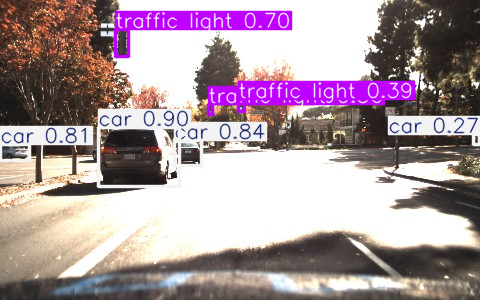

In [26]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))
